In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
companies = pd.read_csv(r'C:\Users\tamil.LAPTOP-OCKTKCUQ\ML_Project\linear regression\1000_Companies.csv')

In [33]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [34]:
# Create dummy variable to convert string type state column into boolean
State = pd.get_dummies(companies["State"])
State.head()

,California,Florida,New York
0,False,False,True
1,True,False,False
2,False,True,False
3,False,False,True
4,False,True,False


In [35]:
# Concatenate dummy state to companies data
t = State
companies = pd.concat([companies,t],axis = 1)
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,False,False,True
1,162597.70,151377.59,443898.53,California,191792.06,True,False,False
2,153441.51,101145.55,407934.54,Florida,191050.39,False,True,False
3,144372.41,118671.85,383199.62,New York,182901.99,False,False,True
4,142107.34,91391.77,366168.42,Florida,166187.94,False,True,False


In [36]:
# Drop the original data and replace it with dummy state
companies.drop("State",axis=1,inplace=True)
companies.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,False,False,True
1,162597.70,151377.59,443898.53,191792.06,True,False,False
2,153441.51,101145.55,407934.54,191050.39,False,True,False
3,144372.41,118671.85,383199.62,182901.99,False,False,True
4,142107.34,91391.77,366168.42,166187.94,False,True,False


In [37]:
# Splitting Dependent and Independent variables
X = companies.drop("Profit",axis=1)
y = companies["Profit"]

<Axes: >

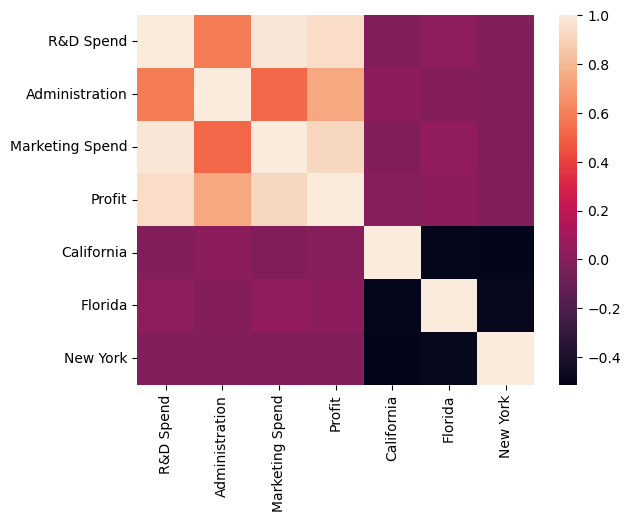

In [38]:
sns.heatmap(companies.corr())
# sns.countplot(x="Profit",data = companies)

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
X[:,3] = le.fit_transform(X[:,3])
X
pd.DataFrame(X)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output = False).set_output(transform='pandas')
X_temp = pd.DataFrame(X)
temp = ohe.fit_transform(X_temp[3].values.reshape(-1,1))
print(temp.shape)
if temp.shape[1] == 3:
    X = np.concatenate([X[:,:3],temp,X[:,4:]],axis=1)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_train

687     81824.87341
500    156340.43820
332    135591.40940
979     60065.21791
817    142927.20940
           ...     
835    143338.97790
192     94376.97653
629     68575.66854
559    106070.51680
684    144805.79620
Name: Profit, Length: 800, dtype: float64

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [41]:
y_predict = regressor.predict(X_test)
y_predict[:6]

array([ 89790.61532916,  88427.07187361,  94894.67836972, 175680.8672561 ,
        83411.73042089, 110571.90200074])

In [42]:
regressor.score(X_test,y_test)

0.9112695892268795

In [43]:
from sklearn.metrics import r2_score,max_error
r2_score(y_test,y_predict)
# max_error(y_test,y_predict)

0.9112695892268795